#### Libraries

In [134]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_classification
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#### Settings

In [2]:
# Display all rows
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Notebook random state
random_state = 421

# Set visuals to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Device
# folder = # Desktop
folder = 'C:/Users/Sam/Desktop/NW Work/DATA/421/hw02/U.S._Chronic_Disease_Indicators__CDI_.csv' # Laptop

# Question 2

#### Generate Data

In [141]:
# Generate random multidimensional data with 1000 samples and 15 features
X_2, y_2 = make_classification(n_samples=1000, 
                               n_features=52,
                               n_classes=2,
                               n_informative=24,
                               random_state=random_state)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_2)

#### K-means from scratch

In [142]:
def KMeans(X, n_clusters, max_iter=1000, random_state=random_state):
    """
    X: numpy array with shape (num_samples, num_features)
    n_clusters: number of clusters to form
    max_iter: maximum number of iterations of the K-Means algorithm
    """
    
    random.seed(random_state)
    
    num_samples, num_features = X.shape
    
    # Initialize cluster centroids
    centroids = X[np.random.choice(num_samples, n_clusters, replace=False), :]
    
    for i in range(max_iter):
        # Calculate Euclidean distance between each sample and centroids
        distances = np.zeros((num_samples, n_clusters))
        for j in range(n_clusters):
            distances[:, j] = np.linalg.norm(X - centroids[j, :], axis=1)
        
        # Assign each sample to the nearest centroid
        cluster_assignment = np.argmin(distances, axis=1)
        
        # Recalculate centroids as mean of samples assigned to each cluster
        for j in range(n_clusters):
            centroids[j, :] = np.mean(X[cluster_assignment == j, :], axis=0)
    
    return cluster_assignment, centroids

#### Run / plot custom K-means

In [147]:
labels, centroids = KMeans(X_2, 2)

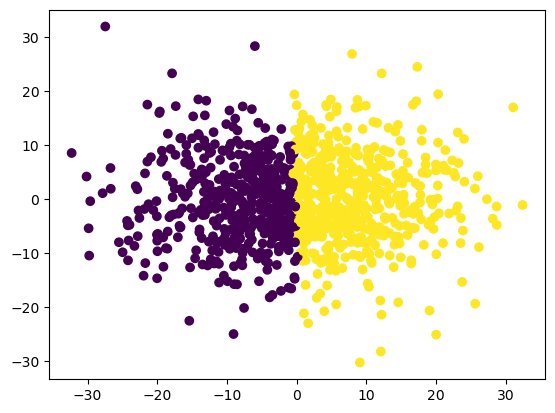

In [148]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

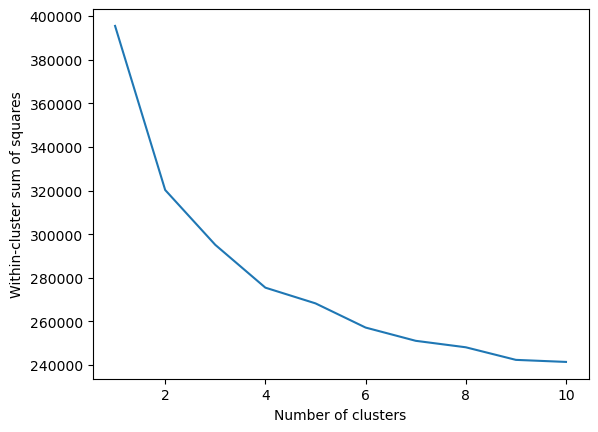

In [149]:
def WCSS(X, labels, centroids):
    """
    Calculate within-cluster sum of squares
    """
    num_samples = X.shape[0]
    wcss = 0
    for i in range(num_samples):
        sample = X[i, :]
        centroid = centroids[labels[i]]
        wcss += np.linalg.norm(sample - centroid) ** 2
    return wcss

k_values = range(1, 11)
wcss_values = []
for k in k_values:
    labels, centroids = KMeans(X_2, k)
    wcss = WCSS(X_2, labels, centroids)
    wcss_values.append(wcss)

plt.plot(k_values, wcss_values)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

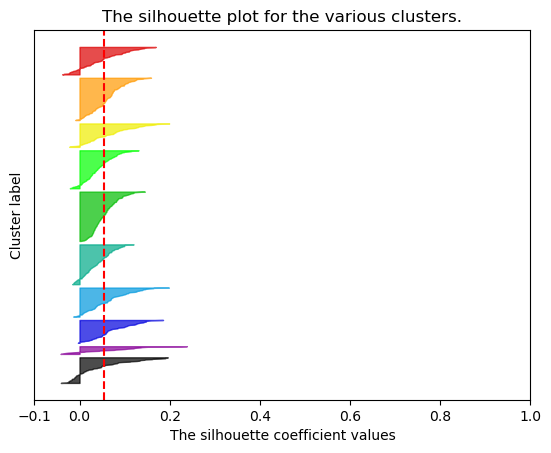

In [151]:
# Calculate the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_2, labels)

# Compute the average silhouette score
average_silhouette_score = silhouette_score(X_2, labels)

# Plot the silhouette scores for each sample
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=average_silhouette_score, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [129]:
visualizer = KElbowVisualizer(KMeans(), n_clusters=(2,10))

TypeError: KMeans() missing 2 required positional arguments: 'X' and 'n_clusters'

In [118]:
average_silhouette_score = silhouette_score(X_2, labels)
average_silhouette_score

0.04470801899941172

In [138]:
# Create an instance of the AgglomerativeClustering class
agg_cluster = AgglomerativeClustering(n_clusters=7)

# Fit the clustering model to the data
agg_cluster.fit(X_2)

# Get the cluster labels for each sample
labels = agg_cluster.labels_

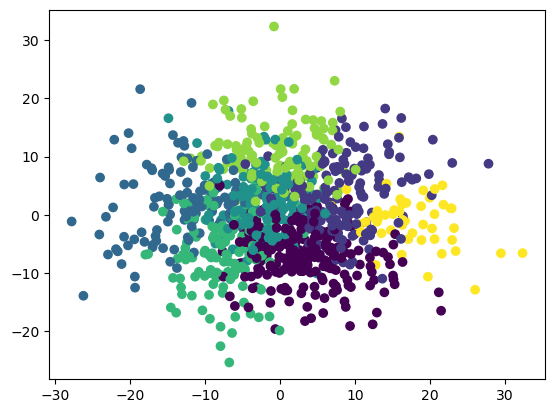

In [139]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()